In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

# Initialize variables to hold the models and vectorizers
org_model, org_vectorizer = None, None
cln_model, cln_vectorizer = None, None

def preprocess_and_train(corpus, corpus_name):
    global org_model, org_vectorizer, cln_model, cln_vectorizer

    X = corpus['text']
    y = corpus['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Vectorize the text data using TF-IDF with max features of 2500
    vectorizer = TfidfVectorizer(max_features=2500)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_tfidf, y_train)

    # Save the model and vectorizer to the corresponding variables
    if corpus_name == "Original":
        org_model = model
        org_vectorizer = vectorizer
    else:
        cln_model = model
        cln_vectorizer = vectorizer

    # Evaluate the model
    y_pred = model.predict(X_test_tfidf)
    print(f"\nLogistic Regression Evaluation on {corpus_name} Corpus:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Extract the feature names (words) and corresponding coefficients from the Logistic Regression model
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_[0]

    # Get the top 10 highest coefficients (both positive and negative)
    top_10_indices = np.argsort(coefficients)[-10:]  # Top 10 highest coefficients
    top_10_words = feature_names[top_10_indices]
    top_10_coefficients = coefficients[top_10_indices]

    # Print the top 10 words with their corresponding coefficients
    print(f"\nTop 10 Words by Logistic Regression Coefficients in {corpus_name} Corpus:")
    for word, coef in zip(top_10_words, top_10_coefficients):
        print(f"Word: {word}, Logistic Coefficient: {coef}")

# Preprocess and evaluate on the original corpus
preprocess_and_train(org_corpus, "Original")

# Preprocess and evaluate on the cleaned corpus
preprocess_and_train(cln_corpus, "Cleaned")

# Now you can use org_model, org_vectorizer, cln_model, and cln_vectorizer in your test cell.


Logistic Regression Evaluation on Original Corpus:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2828
           1       0.92      0.90      0.91      2768

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596

Confusion Matrix:
[[2621  207]
 [ 264 2504]]

Top 10 Words by Logistic Regression Coefficients in Original Corpus:
Word: pills, Logistic Coefficient: 3.9015566970477455
Word: myself, Logistic Coefficient: 3.9856677093169064
Word: killing, Logistic Coefficient: 4.480331490562592
Word: depression, Logistic Coefficient: 4.672003766820471
Word: cannot, Logistic Coefficient: 4.7586668690751015
Word: life, Logistic Coefficient: 5.194938922439081
Word: die, Logistic Coefficient: 5.434294039789528
Word: suicidal, Logistic Coefficient: 5.85685841336842
Word: kill, Logistic Coefficient: 7.115707432511

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

# Initialize variables to hold the models and vectorizers
org_model, org_vectorizer = None, None
cln_model, cln_vectorizer = None, None

def preprocess_and_train(corpus, corpus_name):
    global org_model, org_vectorizer, cln_model, cln_vectorizer

    X = corpus['text']
    y = corpus['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Vectorize the text data using Bag of Words (Count Vectorizer)
    vectorizer = CountVectorizer(max_features=14000)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)

    # Train Logistic Regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_bow, y_train)

    # Save the model and vectorizer to the corresponding variables
    if corpus_name == "Original":
        org_model = model
        org_vectorizer = vectorizer
    else:
        cln_model = model
        cln_vectorizer = vectorizer

    # Evaluate the model
    y_pred = model.predict(X_test_bow)
    print(f"\nLogistic Regression Evaluation on {corpus_name} Corpus:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Extract the feature names (words) and corresponding coefficients from the Logistic Regression model
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_[0]

    # Get the top 10 highest coefficients (both positive and negative)
    top_10_indices = np.argsort(coefficients)[-10:]  # Top 10 highest coefficients
    top_10_words = feature_names[top_10_indices]
    top_10_coefficients = coefficients[top_10_indices]

    # Print the top 10 words with their corresponding coefficients
    print(f"\nTop 10 Words by Logistic Regression Coefficients in {corpus_name} Corpus:")
    for word, coef in zip(top_10_words, top_10_coefficients):
        print(f"Word: {word}, Logistic Coefficient: {coef}")

# Preprocess and evaluate on the original corpus
preprocess_and_train(org_corpus, "Original")

# Preprocess and evaluate on the cleaned corpus
preprocess_and_train(cln_corpus, "Cleaned")

# Now you can use org_model, org_vectorizer, cln_model, and cln_vectorizer in your test cell.


Logistic Regression Evaluation on Original Corpus:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2828
           1       0.92      0.89      0.91      2768

    accuracy                           0.91      5596
   macro avg       0.91      0.91      0.91      5596
weighted avg       0.91      0.91      0.91      5596

Confusion Matrix:
[[2625  203]
 [ 297 2471]]

Top 10 Words by Logistic Regression Coefficients in Original Corpus:
Word: myselfi, Logistic Coefficient: 1.9031672680939762
Word: lonelyi, Logistic Coefficient: 1.9044720093941947
Word: jump, Logistic Coefficient: 1.9691606545280937
Word: helpi, Logistic Coefficient: 2.001582936809072
Word: anymorei, Logistic Coefficient: 2.0811781837292918
Word: mei, Logistic Coefficient: 2.151329068052575
Word: suicide, Logistic Coefficient: 2.1844635299184203
Word: redflag, Logistic Coefficient: 2.220222645990215
Word: killing, Logistic Coefficient: 2.2599052

In [9]:
from mhc_text_cleaner import process_document

# Example test samples
test_samples = [
    "How I sleep knowing everything is ruined and everyone hates me my hate family."
]

# Function to predict using the saved model and vectorizer
def predict_samples(samples, model, vectorizer):
    # Preprocess the samples using the process_document function
    processed_samples = [process_document(sample) for sample in samples]
    X_samples_tfidf = vectorizer.transform(processed_samples)
    predictions = model.predict(X_samples_tfidf)
    for sample, prediction in zip(processed_samples, predictions):
        print(f"Sample: {sample} | Predicted Label: {prediction}")

# Test the original model
print("Testing Original Model:")
predict_samples(test_samples, org_model, org_vectorizer)

# Test the cleaned model
print("\nTesting Cleaned Model:")
predict_samples(test_samples, cln_model, cln_vectorizer)

Testing Original Model:
Sample: sleep knowing everything ruined everyone hate hate family | Predicted Label: 0

Testing Cleaned Model:
Sample: sleep knowing everything ruined everyone hate hate family | Predicted Label: 1


In [3]:
# Function to count samples containing the word 'redflag' for each class
def count_samples_with_word(corpus, word, corpus_name):
    # Find samples that contain the word 'redflag'
    samples_with_word = corpus[corpus['text'].str.contains(word, case=False, na=False)]
    
    # Count how many are in class 0 and class 1
    class_0_count = len(samples_with_word[samples_with_word['label'] == 0])
    class_1_count = len(samples_with_word[samples_with_word['label'] == 1])
    
    # Print the results
    print(f"\nIn the {corpus_name} corpus:")
    print(f"Total samples with the word '{word}': {len(samples_with_word)}")
    print(f"Class 0 samples: {class_0_count}")
    print(f"Class 1 samples: {class_1_count}")

# Count samples with the word 'redflag' in the original corpus
count_samples_with_word(org_corpus, 'im', 'Original')

# Count samples with the word 'redflag' in the cleaned corpus
count_samples_with_word(cln_corpus, 'im', 'Cleaned')


In the Original corpus:
Total samples with the word 'im': 17794
Class 0 samples: 7300
Class 1 samples: 10494

In the Cleaned corpus:
Total samples with the word 'im': 17294
Class 0 samples: 7038
Class 1 samples: 10256


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

# Function to build the MLP model
def build_mlp_model(input_dim):
    model = keras.Sequential()
    model.add(layers.Dense(10, activation='relu', input_dim=input_dim))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to evaluate the MLP on a given corpus
def evaluate_mlp(corpus, corpus_name):
    X = corpus['text']
    y = corpus['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorize the text data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=4096)
    X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
    X_test_tfidf = vectorizer.transform(X_test).toarray()

    # Build and train the MLP model
    model = build_mlp_model(input_dim=X_train_tfidf.shape[1])
    model.fit(X_train_tfidf, y_train, epochs=5, batch_size=32, verbose=1)

    # Evaluate the model
    y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

    # Print classification report and confusion matrix
    print(f"MLP on {corpus_name} Corpus - Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"MLP on {corpus_name} Corpus - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Evaluate MLP on the original corpus
evaluate_mlp(org_corpus, 'Original')

# Evaluate MLP on the cleaned corpus
evaluate_mlp(cln_corpus, 'Cleaned')

F:\Python3-12-5\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.8448 - loss: 0.4581
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9395 - loss: 0.1630
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9495 - loss: 0.1390
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9566 - loss: 0.1214
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9614 - loss: 0.1167
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
MLP on Original Corpus - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2802
           1       0.91      0.93      0.92      2794

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596

MLP on Original Corpus - Confusion Matrix:
[[2544  258]
 [ 200 2594]]
Epoch 1/5


F:\Python3-12-5\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


581/581 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.8161 - loss: 0.4765
Epoch 2/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9374 - loss: 0.1688
Epoch 3/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9511 - loss: 0.1350
Epoch 4/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9621 - loss: 0.1136
Epoch 5/5
581/581 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.9670 - loss: 0.0979
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
MLP on Cleaned Corpus - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2099
           1       0.93      0.91      0.92      2549

    accuracy                           0.91      4648
   macro avg       0.91      0.91      0.91      4648
weighted avg       0.91      0.91      0.91      4648

MLP on Cleaned Corpus - Confusion Matrix:
[[1914  185]
 [ 221 2328]]


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def preprocess_and_train_naive_bayes(corpus, corpus_name):
    X = corpus['text']
    y = corpus['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    vectorizer = CountVectorizer(max_features=2500)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train Naive Bayes model
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_tfidf)
    print(f"\nNaive Bayes Evaluation on {corpus_name} Corpus:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Preprocess and evaluate on the original corpus
preprocess_and_train_naive_bayes(org_corpus, "Original")

# Preprocess and evaluate on the cleaned corpus
preprocess_and_train_naive_bayes(cln_corpus, "Cleaned")


Naive Bayes Evaluation on Original Corpus:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      2828
           1       0.79      0.97      0.87      2768

    accuracy                           0.85      5596
   macro avg       0.87      0.86      0.85      5596
weighted avg       0.87      0.85      0.85      5596

Confusion Matrix:
[[2111  717]
 [  95 2673]]

Naive Bayes Evaluation on Cleaned Corpus:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      2118
           1       0.82      0.96      0.89      2530

    accuracy                           0.87      4648
   macro avg       0.88      0.86      0.86      4648
weighted avg       0.88      0.87      0.86      4648

Confusion Matrix:
[[1595  523]
 [  95 2435]]


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def preprocess_and_train_knn(corpus, corpus_name, k_values):
    X = corpus['text']
    y = corpus['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Vectorize the text data using TF-IDF with max features of 2500
    vectorizer = TfidfVectorizer(max_features=14000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Evaluate KNN with different k values
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_tfidf, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test_tfidf)
        print(f"\nKNN Evaluation on {corpus_name} Corpus with k={k}:")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

# Define the k values to test
k_values = [1, 5, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

# Preprocess and evaluate on the original corpus
preprocess_and_train_knn(org_corpus, "Original", k_values)

# Preprocess and evaluate on the cleaned corpus
preprocess_and_train_knn(cln_corpus, "Cleaned", k_values)


KNN Evaluation on Original Corpus with k=1:
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.99      0.67      2828
           1       0.77      0.03      0.06      2768

    accuracy                           0.52      5596
   macro avg       0.64      0.51      0.37      5596
weighted avg       0.64      0.52      0.37      5596

Confusion Matrix:
[[2802   26]
 [2680   88]]

KNN Evaluation on Original Corpus with k=5:
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.70      0.60      2828
           1       0.53      0.34      0.42      2768

    accuracy                           0.52      5596
   macro avg       0.53      0.52      0.51      5596
weighted avg       0.53      0.52      0.51      5596

Confusion Matrix:
[[1983  845]
 [1814  954]]

KNN Evaluation on Original Corpus with k=10:
Classification Report:
              precision    recall  f1-score   suppo

F:\Python3-12-5\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Python3-12-5\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
F:\Python3-12-5\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
from sklearn.svm import SVC  # Import SVM Classifier

def preprocess_and_train_svm(corpus, corpus_name):
    X = corpus['text']
    y = corpus['label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Vectorize the text data using TF-IDF with max features of 2500
    vectorizer = TfidfVectorizer(max_features=14000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train Support Vector Machine model
    model = SVC(kernel='linear', random_state=42)  # Using linear kernel
    model.fit(X_train_tfidf, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test_tfidf)
    print(f"\nSVM Evaluation on {corpus_name} Corpus:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Preprocess and evaluate on the original corpus
preprocess_and_train_svm(org_corpus, "Original")

# Preprocess and evaluate on the cleaned corpus
preprocess_and_train_svm(cln_corpus, "Cleaned")


SVM Evaluation on Original Corpus:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2828
           1       0.92      0.91      0.91      2768

    accuracy                           0.91      5596
   macro avg       0.91      0.91      0.91      5596
weighted avg       0.91      0.91      0.91      5596

Confusion Matrix:
[[2601  227]
 [ 255 2513]]

SVM Evaluation on Cleaned Corpus:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2118
           1       0.93      0.91      0.92      2530

    accuracy                           0.91      4648
   macro avg       0.91      0.91      0.91      4648
weighted avg       0.91      0.91      0.91      4648

Confusion Matrix:
[[1939  179]
 [ 219 2311]]


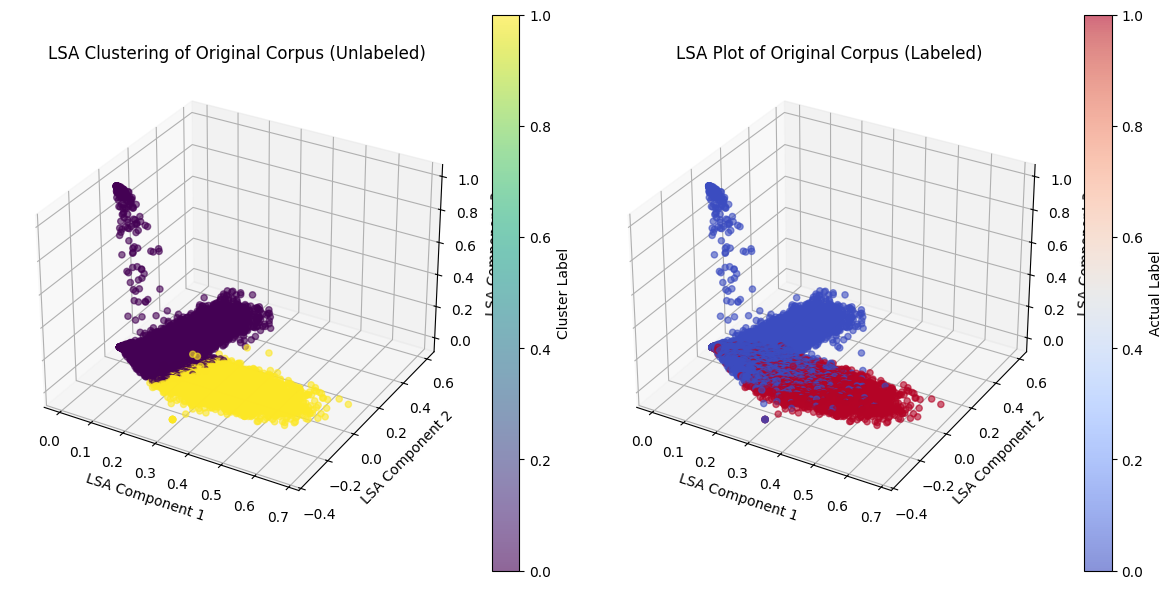

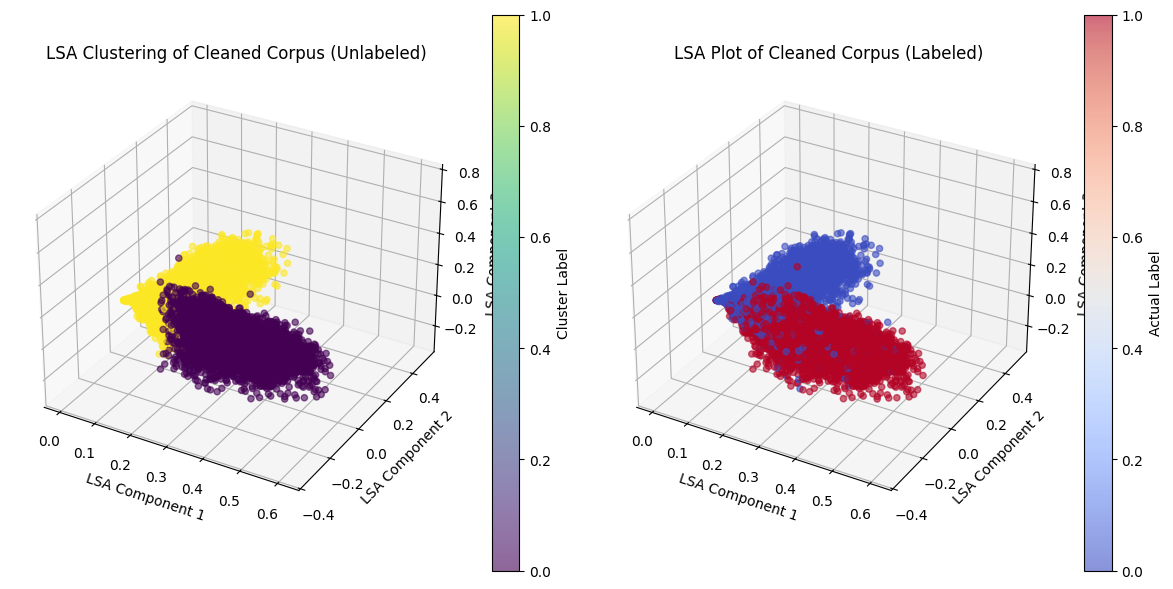

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def perform_clustering_and_lsa(corpus, corpus_name):
    # Vectorize the text data using TF-IDF with max features of 15000
    vectorizer = TfidfVectorizer(max_features=2500)
    X_tfidf = vectorizer.fit_transform(corpus['text'])

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters
    cluster_labels = kmeans.fit_predict(X_tfidf)

    # Apply LSA using Truncated SVD with 3 components
    lsa = TruncatedSVD(n_components=3, random_state=42)
    X_lsa = lsa.fit_transform(X_tfidf)

    # Plotting the clusters without labels in 3D
    fig = plt.figure(figsize=(12, 6))
    
    # 3D Plot for clusters
    ax1 = fig.add_subplot(121, projection='3d')  # First plot for clusters
    scatter = ax1.scatter(X_lsa[:, 0], X_lsa[:, 1], X_lsa[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
    ax1.set_title(f'LSA Clustering of {corpus_name} Corpus (Unlabeled)')
    ax1.set_xlabel('LSA Component 1')
    ax1.set_ylabel('LSA Component 2')
    ax1.set_zlabel('LSA Component 3')
    fig.colorbar(scatter, ax=ax1, label='Cluster Label')

    # 3D Plotting the data with actual labels
    ax2 = fig.add_subplot(122, projection='3d')  # Second plot for labels
    scatter_labels = ax2.scatter(X_lsa[:, 0], X_lsa[:, 1], X_lsa[:, 2], c=corpus['label'], cmap='coolwarm', alpha=0.6)
    ax2.set_title(f'LSA Plot of {corpus_name} Corpus (Labeled)')
    ax2.set_xlabel('LSA Component 1')
    ax2.set_ylabel('LSA Component 2')
    ax2.set_zlabel('LSA Component 3')
    fig.colorbar(scatter_labels, ax=ax2, label='Actual Label')

    plt.tight_layout()
    plt.show()

# Perform clustering and LSA on the original corpus
perform_clustering_and_lsa(org_corpus, "Original")

# Perform clustering and LSA on the cleaned corpus
perform_clustering_and_lsa(cln_corpus, "Cleaned")

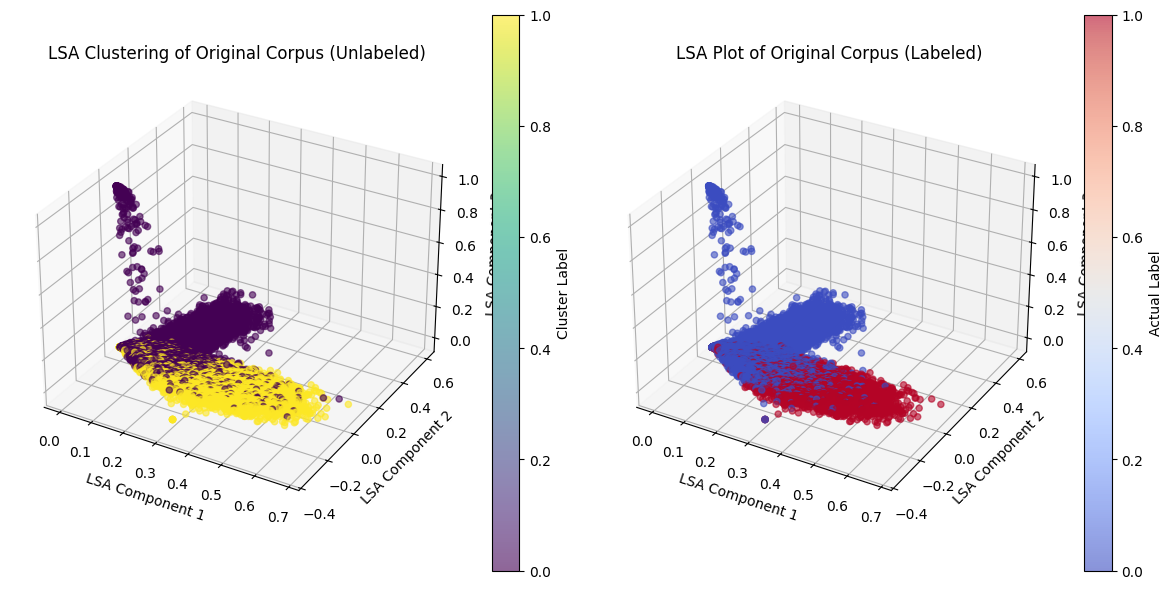

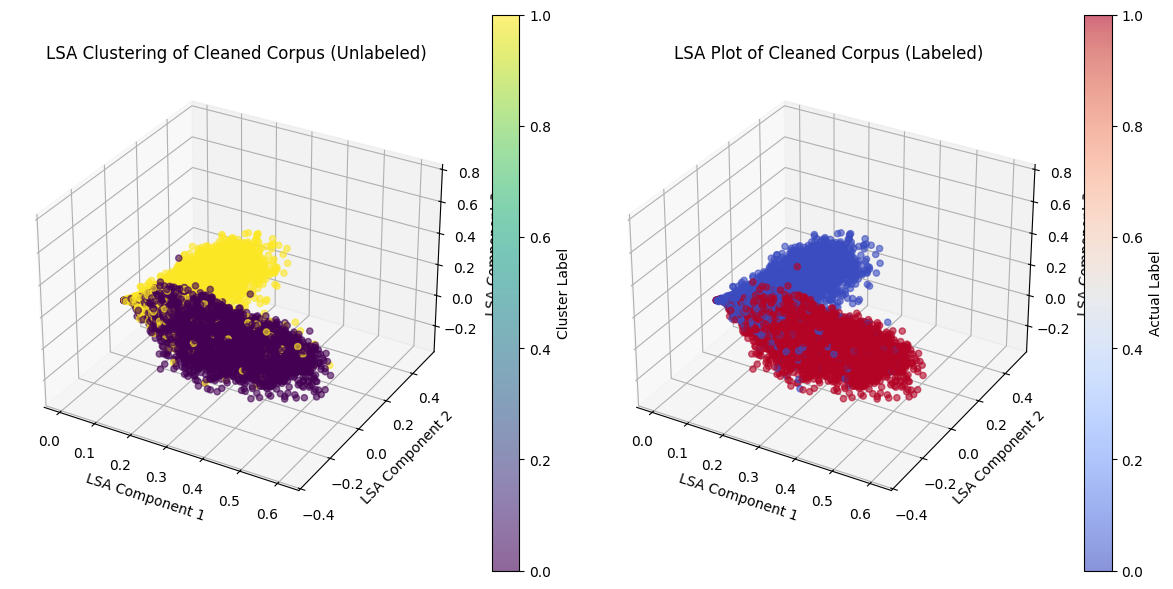

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def perform_clustering_and_lsa(corpus, corpus_name):
    # Vectorize the text data using TF-IDF with max features of 14000
    vectorizer = TfidfVectorizer(max_features=2500)
    X_tfidf = vectorizer.fit_transform(corpus['text'])

    # Perform GMM clustering
    gmm = GaussianMixture(n_components=2, random_state=42)  # You can adjust the number of components
    cluster_labels = gmm.fit_predict(X_tfidf.toarray())

    # Apply LSA using Truncated SVD with 3 components
    lsa = TruncatedSVD(n_components=3, random_state=42)
    X_lsa = lsa.fit_transform(X_tfidf)

    # Plotting the clusters without labels in 3D
    fig = plt.figure(figsize=(12, 6))
    
    # 3D Plot for clusters
    ax1 = fig.add_subplot(121, projection='3d')  # First plot for clusters
    scatter = ax1.scatter(X_lsa[:, 0], X_lsa[:, 1], X_lsa[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
    ax1.set_title(f'LSA Clustering of {corpus_name} Corpus (Unlabeled)')
    ax1.set_xlabel('LSA Component 1')
    ax1.set_ylabel('LSA Component 2')
    ax1.set_zlabel('LSA Component 3')
    fig.colorbar(scatter, ax=ax1, label='Cluster Label')

    # 3D Plotting the data with actual labels
    ax2 = fig.add_subplot(122, projection='3d')  # Second plot for labels
    scatter_labels = ax2.scatter(X_lsa[:, 0], X_lsa[:, 1], X_lsa[:, 2], c=corpus['label'], cmap='coolwarm', alpha=0.6)
    ax2.set_title(f'LSA Plot of {corpus_name} Corpus (Labeled)')
    ax2.set_xlabel('LSA Component 1')
    ax2.set_ylabel('LSA Component 2')
    ax2.set_zlabel('LSA Component 3')
    fig.colorbar(scatter_labels, ax=ax2, label='Actual Label')

    plt.tight_layout()
    plt.show()

# Perform clustering and LSA on the original corpus
perform_clustering_and_lsa(org_corpus, "Original")

# Perform clustering and LSA on the cleaned corpus
perform_clustering_and_lsa(cln_corpus, "Cleaned")

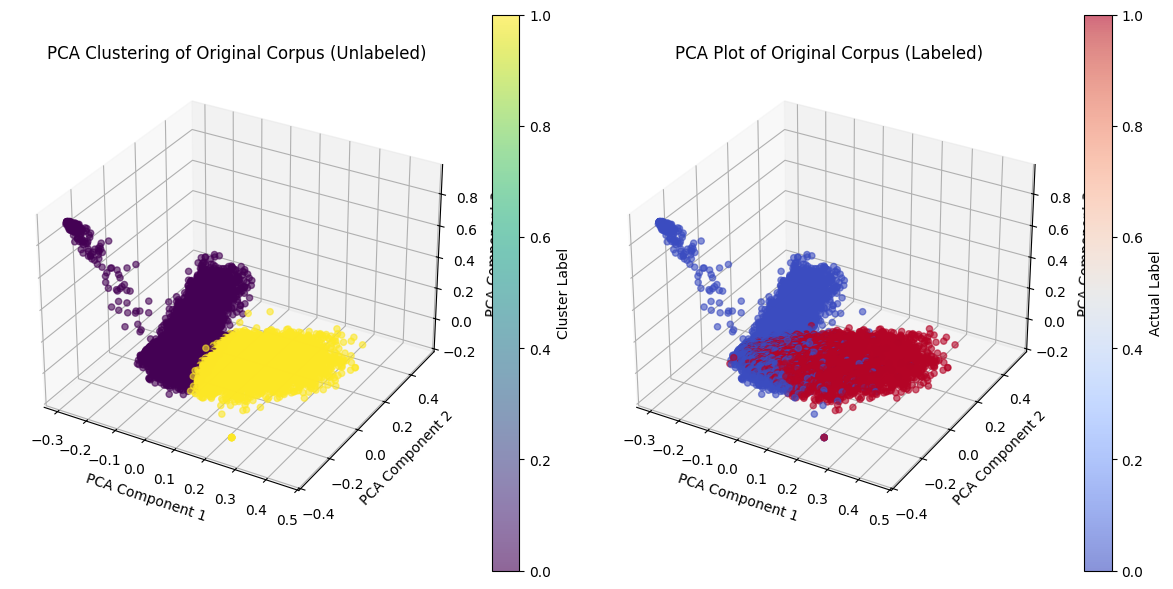

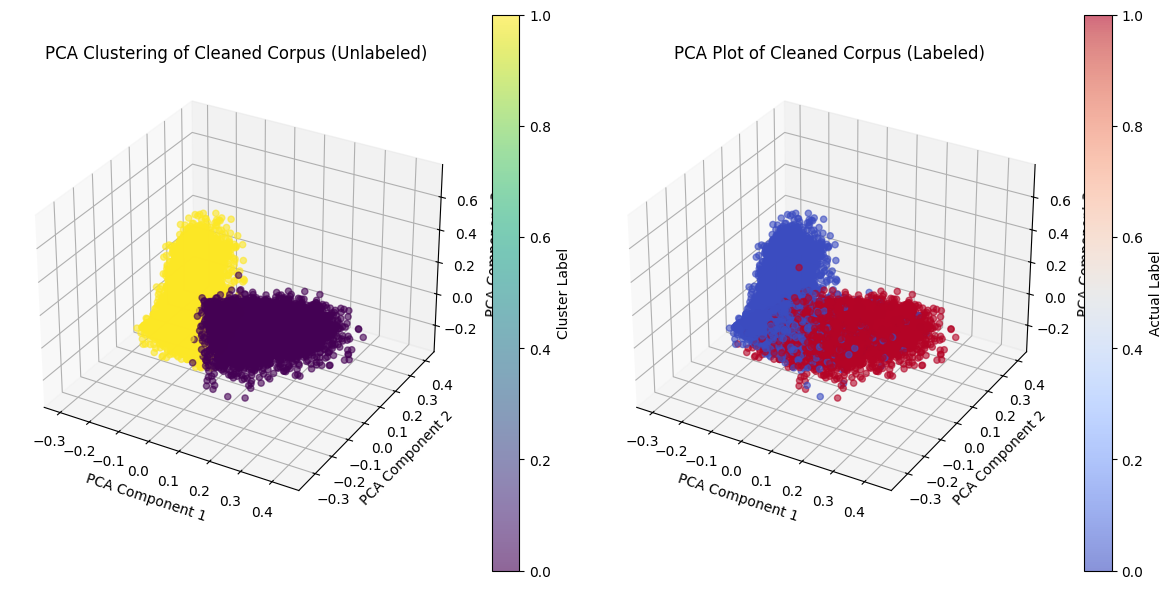

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the original and cleaned corpora
org_corpus = pd.read_csv('data/mental_health.csv')
cln_corpus = pd.read_csv('data/cleaned_mhc.csv')

def perform_clustering_and_pca(corpus, corpus_name):
    # Vectorize the text data using TF-IDF with max features of 2500
    vectorizer = TfidfVectorizer(max_features=2500)
    X_tfidf = vectorizer.fit_transform(corpus['text'])

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters
    cluster_labels = kmeans.fit_predict(X_tfidf)

    # Apply PCA with 3 components
    pca = PCA(n_components=3, random_state=42)
    X_pca = pca.fit_transform(X_tfidf.toarray())

    # Plotting the clusters without labels in 3D
    fig = plt.figure(figsize=(12, 6))
    
    # 3D Plot for clusters
    ax1 = fig.add_subplot(121, projection='3d')  # First plot for clusters
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
    ax1.set_title(f'PCA Clustering of {corpus_name} Corpus (Unlabeled)')
    ax1.set_xlabel('PCA Component 1')
    ax1.set_ylabel('PCA Component 2')
    ax1.set_zlabel('PCA Component 3')
    fig.colorbar(scatter, ax=ax1, label='Cluster Label')

    # 3D Plotting the data with actual labels
    ax2 = fig.add_subplot(122, projection='3d')  # Second plot for labels
    scatter_labels = ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=corpus['label'], cmap='coolwarm', alpha=0.6)
    ax2.set_title(f'PCA Plot of {corpus_name} Corpus (Labeled)')
    ax2.set_xlabel('PCA Component 1')
    ax2.set_ylabel('PCA Component 2')
    ax2.set_zlabel('PCA Component 3')
    fig.colorbar(scatter_labels, ax=ax2, label='Actual Label')

    plt.tight_layout()
    plt.show()

# Perform clustering and PCA on the original corpus
perform_clustering_and_pca(org_corpus, "Original")

# Perform clustering and PCA on the cleaned corpus
perform_clustering_and_pca(cln_corpus, "Cleaned")
